## Selection Sort and Insertion Sort 
-----

In [1]:
import math
import numpy as np
import random

In [2]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set()

----

### Selection Sort

In [3]:
def selectionSort(coll):
    n_instr = 0
    A = list(coll)
    for i in range(len(A)): 
        # Find the minimum element in remaining unsorted array 
        min_idx = i 
        for j in range(i+1, len(A)): 
            if A[min_idx] > A[j]: 
                min_idx = j 
                n_instr += 1
            n_instr += 2

        # Swap the found minimum element with  
        # the first element         
        A[i], A[min_idx] = A[min_idx], A[i]
        n_instr += 2
    return A, n_instr

In [4]:
## Check correctdness your implementation!

def test_sortedness(my_list):
    return my_list == sorted(my_list)

my_list = list(range(10))[::-1]

print(selectionSort(my_list))

assert test_sortedness( selectionSort(my_list)[0] ), "Must be increasing!"

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 135)


----

### Insertion Sort

In [5]:
def insertionSort(coll):
    n_instr = 0
    A = list(coll)
    for i in range(1, len(A)):
        curr = A[i]
        j = i-1
        n_instr += 3
        while j >= 0 and curr < A[j]:
            A[j+1] = A[j]
            j -= 1
            n_instr += 3
        A[j+1] = curr
    return A, n_instr

In [6]:
## Check correctdness your implementation!

my_list = list(range(10))[::-1]

print(insertionSort(my_list))

assert test_sortedness( insertionSort(my_list)[0] ), "Must be increasing!"

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 162)


-------
### Selection Sort vs Insertion Sort

### Test on Random Arrays (close to worst case for both)

In [7]:
ops_IS = []
ops_SS = []
ns = []

n_repeats = 10
start = 6
end = 14

for i in range(start, end): # Use powers of two
        ns.append( int(math.pow(2, i)) )

In [8]:
for n in ns:
    tot_IS = 0
    tot_SS = 0
    for _ in range(n_repeats):
        A = np.random.permutation(n)
        _, IS = insertionSort(A)
        _, SS = selectionSort(A)
        tot_IS += IS
        tot_SS += SS
    ops_IS.append( int(tot_IS / n_repeats) ) ## put avg
    ops_SS.append( int(tot_SS / n_repeats) )


3272	4344
12647	16954
49643	66830
198391	265124
791990	1055255
3144489	4208990
12605286	16809590
50227669	67178949


In [10]:
for IS, SS, n in zip(ops_IS, ops_SS, ns):
    print(n, IS, SS, IS/n, SS/n, sep="\t")

64	3272	4344	51.125	67.875
128	12647	16954	98.8046875	132.453125
256	49643	66830	193.91796875	261.0546875
512	198391	265124	387.482421875	517.8203125
1024	791990	1055255	773.427734375	1030.5224609375
2048	3144489	4208990	1535.39501953125	2055.1708984375
4096	12605286	16809590	3077.46240234375	4103.90380859375
8192	50227669	67178949	6131.3072509765625	8200.555297851562


### Plot

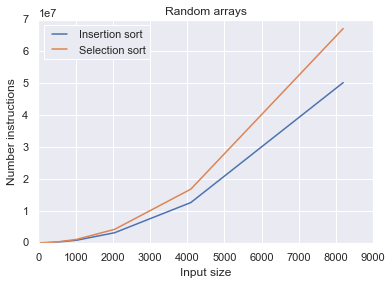

In [11]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(ns, ops_IS, label='Insertion sort')
ax.plot(ns, ops_SS, label='Selection sort')
ax.set_title("Random arrays")
ax.set_xlabel('Input size')  # Add an x-label to the axes.
ax.set_ylabel('Number instructions')  # Add a y-label to the axes.
_ = ax.legend(loc="upper left")

### Test on almost sorted arrays (close to best case for Insertion Sort)

In [15]:
n_changes = 0.01 # permute 10% of the elements in a sorted array
ops_IS = []
ops_SS = []

for n in ns:
    tot_IS = 0
    tot_SS = 0
    for _ in range(n_repeats):
        A = np.arange(n)
        
        for _ in range(int(n_changes*n)):
            i = random.randint(0, n-1)
            j = random.randint(0, n-1)
            A[i], A[j] = A[j], A[i]
            
        _, IS = insertionSort(A)
        _, SS = selectionSort(A)
        tot_IS += IS
        tot_SS += SS
    ops_IS.append( int(tot_IS / n_repeats) ) ## put avg
    ops_SS.append( int(tot_SS / n_repeats) )

In [13]:
for IS, SS, n in zip(ops_IS, ops_SS, ns):
    print(n, IS, SS, IS/n, SS/n, sep="\t")

64	703	4171	10.984375	65.171875
128	2694	16537	21.046875	129.1953125
256	12214	65844	47.7109375	257.203125
512	45787	262765	89.427734375	513.212890625
1024	189190	1049818	184.755859375	1025.212890625
2048	737654	4196789	360.1826171875	2049.21337890625
4096	2905028	16782190	709.2353515625	4097.21435546875
8192	11608311	67118811	1417.0301513671875	8193.214233398438


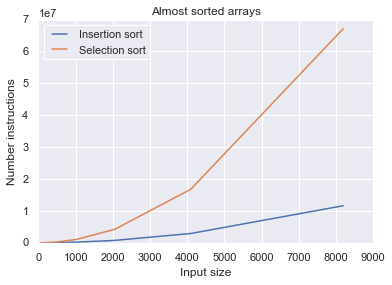

In [14]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(ns, ops_IS, label='Insertion sort')
ax.plot(ns, ops_SS, label='Selection sort')
ax.set_title("Almost sorted arrays")
ax.set_xlabel('Input size')  # Add an x-label to the axes.
ax.set_ylabel('Number instructions')  # Add a y-label to the axes.
_ = ax.legend(loc="upper left")